*pas dit blok aan (dubbelklik om te wijzigen)*

# 2020 Diffusie werkcollege opdracht
***

## Datum: 20-feb-2020
## Hoofdstuk: 3
## Groep nummer: 32
***
## Student 1
    naam: Julian van Doorn
    Studentnr: s2518074

## Student 2
    naam: Bálint Bosman
    Studentnr: s2593149


In [19]:
# Dit blok moet altijd als eerste worden uitgevoerd. Verwijder het dus niet!
# voer blokken uit met shift-enter, of met de ▶-knop in de knoppenbalk

from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Shape of richtingen: (10000, 2000)
Shape of eind_posities: (10000,)


Text(0, 0.5, 'Frequency')

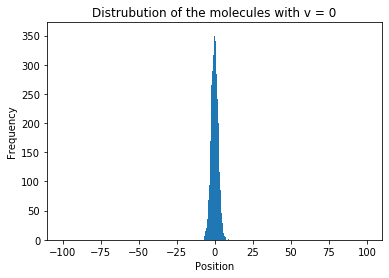

In [20]:
# Opgave 3.4 a

moleculen = 10000
step_size = 0.05
bin_size = 0.2
steps = 2000

bins = np.arange(- steps * step_size - bin_size / 2, steps * step_size + bin_size / 2, bin_size)
centers = np.arange(-steps * step_size, steps * step_size, bin_size)

richtingen = np.random.choice([-step_size, step_size], (moleculen, steps))
print(f'Shape of richtingen: {np.shape(richtingen)}')

eind_posities = np.sum(richtingen, axis=1)
print(f'Shape of eind_posities: {np.shape(eind_posities)}')

frequencies, grenzen = np.histogram(eind_posities, bins)

plt.bar(centers, frequencies, width=bin_size)
plt.title('Distrubution of the molecules with v = 0')
plt.xlabel('Position')
plt.ylabel('Frequency')


Text(0, 0.5, 'Propability')

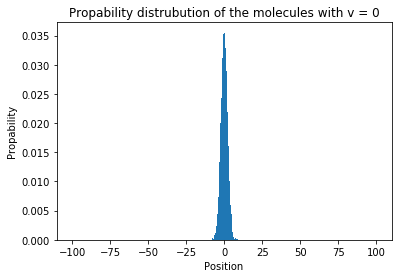

In [21]:
# Opgave 3.4 b

# De kans dat een molecuul zich bevind op positie X is de frequentie geddeld door het aantal.
normalized = frequencies / moleculen

plt.bar(centers, normalized, width=bin_size)
plt.title('Propability distrubution of the molecules with v = 0')
plt.xlabel('Position')
plt.ylabel('Propability')

Shape of posities: (10000, 2000)


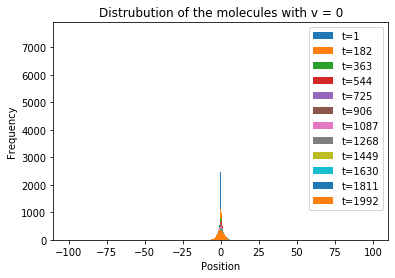

In [22]:
# Opgave 3.4 c

posities = np.cumsum(richtingen, axis=1)
print(f'Shape of posities: {np.shape(posities)}')

timestamps = range(1, steps, steps // 11)
for t in timestamps:
    frequencies, grenzen = np.histogram(posities[:,t], bins)

    plt.bar(centers, frequencies, label=f't={t}', width=bin_size)

plt.title('Distrubution of the molecules with v = 0')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.legend()

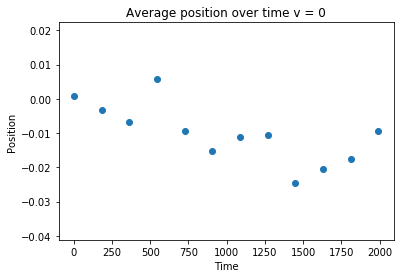

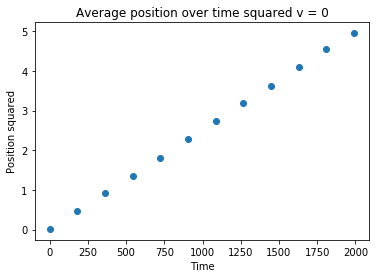

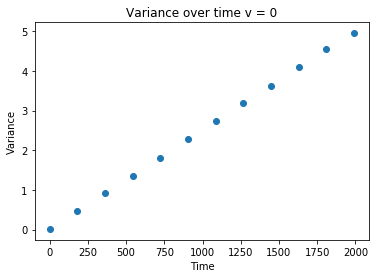

In [23]:
# Opgave 3.4 d
mean_x = []
mean_x_squared = []

for t in timestamps:
    mean_x.append(np.average(posities[:,t]))
    mean_x_squared.append(np.average(np.square(posities[:,t])))
    
mean_x = np.array(mean_x)
mean_x_squared = np.array(mean_x_squared)
variance = mean_x_squared - np.square(mean_x)

plt.scatter(timestamps, mean_x)
plt.title('Average position over time v = 0')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

plt.scatter(timestamps, mean_x_squared)
plt.title('Average position over time squared v = 0')
plt.xlabel('Time')
plt.ylabel('Position squared')
plt.show()

plt.scatter(timestamps, variance)
plt.title('Variance over time v = 0')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.show()

De diffusieconstante is: [0.002513   0.00127498 0.00126226 0.00125312 0.00125234 0.00126153
 0.00125745 0.00125804 0.0012509  0.00125856 0.00125436 0.00124565]
Excluding the first point the average is D=0.0013618502031500753


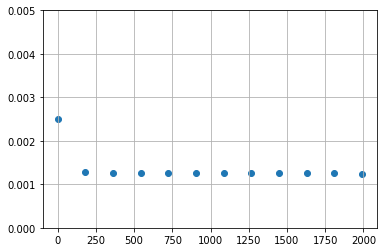

In [24]:
# Opgave 3.4 e

# <x^2> = 2Dt where D is the Diffusion constant and t the time
plt.scatter(timestamps,0.5 * mean_x_squared / timestamps)
plt.axis(ymin=0, ymax=0.005)
plt.grid()
print(f'De diffusieconstante is: {0.5 * mean_x_squared / (timestamps)}')
print(f'Excluding the first point the average is D={np.mean(0.5 * mean_x_squared / (timestamps))}')

De diffusieconstante is: [0.009984   0.00496905 0.00496858 0.00494807 0.00491483 0.00495057
 0.0049364  0.004962   0.00495077 0.00496413 0.00499673 0.00501771]
Excluding the first point the average is D=0.004961713964043183


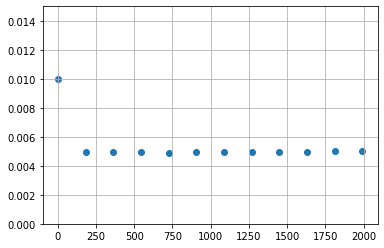

In [25]:
# Opgave 3.3 f
step_size = 0.1

bins = np.arange(- steps * step_size - bin_size / 2, steps * step_size + bin_size / 2, bin_size)
centers = np.arange(-steps * step_size, steps * step_size, bin_size)

richtingen = np.random.choice([-step_size, step_size], (moleculen, steps))
eind_posities = np.sum(richtingen, axis=1)
frequencies, grenzen = np.histogram(eind_posities, bins)
posities = np.cumsum(richtingen, axis=1)
timestamps = range(1, steps, steps // 11)

mean_x = []
mean_x_squared = []

for t in timestamps:
    mean_x.append(np.average(posities[:,t]))
    mean_x_squared.append(np.average(np.square(posities[:,t])))
    
mean_x = np.array(mean_x)
mean_x_squared = np.array(mean_x_squared)
variance = mean_x_squared - np.square(mean_x)

plt.scatter(timestamps,0.5 * mean_x_squared / timestamps)
plt.axis(ymin=0, ymax=0.015)
plt.grid()
print(f'De diffusieconstante is: {0.5 * mean_x_squared / (timestamps)}')
print(f'Excluding the first point the average is D={np.mean((0.5 * mean_x_squared / (timestamps))[1:])}')

Onze berekeningen laten zien dat bij step_size = 0.05 we een D=0.0013 en met step_size = 0.1 we een D=0.0054. Dit is dus ongeveer 4 keer zo groot. Onze step_size is verdubbeld dus wellicht zit hier een kwadratisch verband tussen.

(-10, 109.790000000003, -419.05, 8800.05)

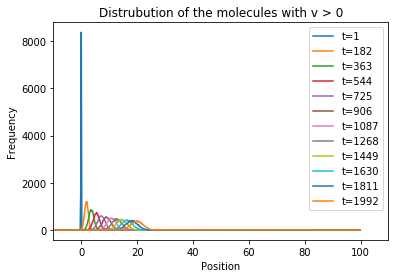

In [26]:
# Opgave 3.5 a
step_size = 0.05

bins = np.arange(- steps * step_size - bin_size / 2, steps * step_size + bin_size / 2, bin_size)
centers = np.arange(-steps * step_size, steps * step_size, bin_size)

# We hebben 2 * links en 3 * rechts -> 40% / 60%
richtingen = np.random.choice([-step_size, -step_size, step_size, step_size, step_size], (moleculen, steps))
eind_posities = np.sum(richtingen, axis=1)
frequencies, grenzen = np.histogram(eind_posities, bins)
posities = np.cumsum(richtingen, axis=1)
timestamps = range(1, steps, steps // 11)

for t in timestamps:
    frequencies, grenzen = np.histogram(posities[:,t], bins)

    plt.plot(centers, frequencies, label=f't={t}')

plt.title('Distrubution of the molecules with v > 0')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.legend()
plt.axis(xmin=-10)

We zien dat de toppen zich naar rechts verplaatsen, dit is ook waar de stikstof naartoe stroomt. Dit is dus verwacht.

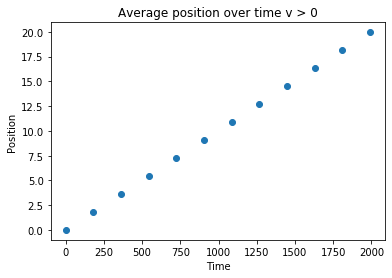

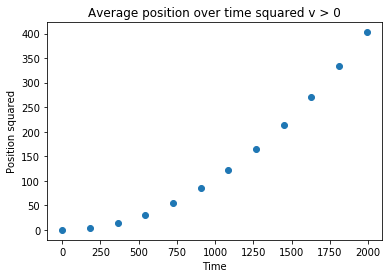

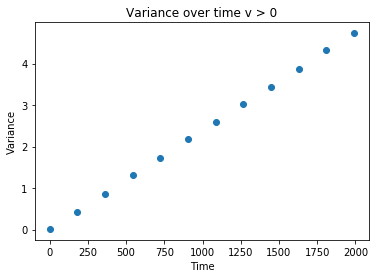

In [27]:
# Opgave 3.5 b
mean_x = []
mean_x_squared = []

for t in timestamps:
    mean_x.append(np.average(posities[:,t]))
    mean_x_squared.append(np.average(np.square(posities[:,t])))
    
mean_x = np.array(mean_x)
mean_x_squared = np.array(mean_x_squared)
variance = mean_x_squared - np.square(mean_x)

plt.scatter(timestamps, mean_x)
plt.title('Average position over time v > 0')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

plt.scatter(timestamps, mean_x_squared)
plt.title('Average position over time squared v > 0')
plt.xlabel('Time')
plt.ylabel('Position squared')
plt.show()

plt.scatter(timestamps, variance)
plt.title('Variance over time v > 0')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.show()

In [28]:
# Opgave 3.5 c
# <x^2> = 2Dt where D is the Diffusion constant and t the time
print(f'De diffusieconstante is: {0.5 * mean_x_squared / (timestamps)}')
print(f'Excluding the first point the average is D={np.mean((0.5 * mean_x_squared / (timestamps))[1:])}')

# De driftsnelheid is de afgeleide van de gemiddelde x waarde.
print(f'De drifsnelheid is: {mean_x / (timestamps)}')
print(f'Uitgezonderd van het eerste punt is de driftsnelheid gemiddeld {np.mean((mean_x / (timestamps))[1:])}')

De diffusieconstante is: [0.0025955  0.01039398 0.01939583 0.02842582 0.03755498 0.04665451
 0.05566665 0.06473383 0.07378628 0.08288692 0.09200901 0.10105767]
Excluding the first point the average is D=0.05568777008157007
De drifsnelheid is: [0.01953    0.01005643 0.0100157  0.01000526 0.01001537 0.01001646
 0.01001147 0.01001146 0.0100103  0.01001241 0.01001473 0.01001342]
Uitgezonderd van het eerste punt is de driftsnelheid gemiddeld 0.01001663698836527


# Opgave 3.5 d
De gemiddelde verplaatsing is (60 - 40) * 0.05 / deeltjes = 1 / 10000 = 0.00001 (waarin deeltjes het aantal deeltjes is).

Het tweede moment is D * t = 0.01 * 1 = 0.01 waarin D de hiervoor berekende diffusie constante is en t = 1 (tijdstap).

De variantie is dan 0.01 - 0.00001^2 ~= 0.01. 

In [29]:
# Opgave 3.5 e
print(f'Numerieke variantie op t=1 is {variance[0]}.')

Numerieke variantie op t=1 is 0.004809579100000001.


Door de verplaatsing van de stikstof kan je niet zomaar normale variantie gebruiken, maar moet je gebruik maken van centrale variantie. Hierin zit een factor 2 verwerkt die we terug zijn in het verschil tussen de voorspelde en gemeten waarden.

(-10, 108.95, -500.0, 10500.0)

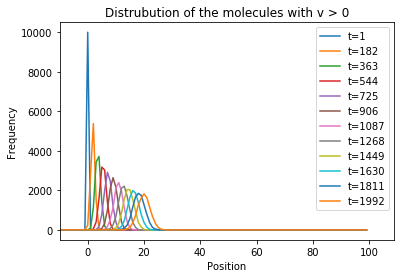

In [30]:
# Opgave 3.5 f
bin_size = 1
bins = np.arange(- steps * step_size - bin_size / 2, steps * step_size + bin_size / 2, bin_size)
centers = np.arange(-steps * step_size, steps * step_size, bin_size)

for t in timestamps:
    frequencies, grenzen = np.histogram(posities[:,t], bins)

    plt.plot(centers, frequencies, label=f't={t}')

plt.title('Distrubution of the molecules with v > 0')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.legend()
plt.axis(xmin=-10)

In [31]:
# Opgave 3.6 a

def diffuse(n_molecules=10, n_t=25, dx=0.05):
    time = np.linspace(0, n_t, n_t)
    
    richtingen = np.random.choice([-dx, -dx, dx, dx, dx], (n_molecules, n_t))
    posities = np.cumsum(richtingen, axis=1)
    
    M1 = np.average(posities, axis=0)
    M2 = np.average(np.square(posities), axis=0)
    variance = M1 - np.square(M2)
    
    return time, M1, M2, variance

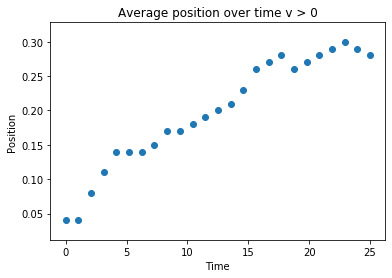

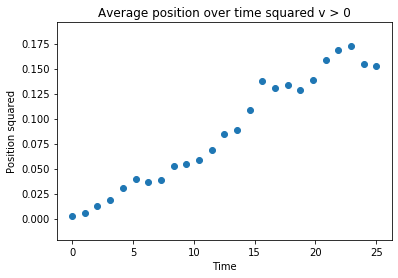

In [32]:
# Opgave 3.6 b
time, M1, M2, variance = diffuse()

plt.scatter(time, M1)
plt.title('Average position over time v > 0')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

plt.scatter(time, M2)
plt.title('Average position over time squared v > 0')
plt.xlabel('Time')
plt.ylabel('Position squared')
plt.show()

In [33]:
# Opgave 3.6 c
from scipy.stats import linregress

def linear_fit(x, y):
    # linregress uses least square method.
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    
    return f'f(x)={slope:.2f}x + {intercept:.2f}', slope, intercept

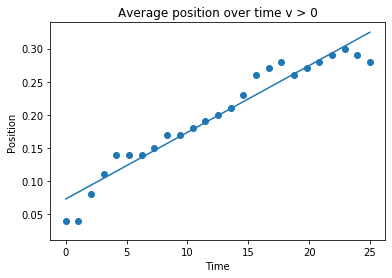

In [34]:
# Opgave 3.6 d
f_x, a, b = linear_fit(time, M1)

plt.scatter(time, M1)
plt.plot(time, a * time + b)
plt.title('Average position over time v > 0')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

In [37]:
# Opgave 3.6 e

diffusion_constants = []
for i in range(0, 10):
    time, M1, M2, variance = diffuse()
    
    diffusion_constants.append(np.mean(M2[1:] / (2 * time[1:])))
    
diffusion_constants = np.array(diffusion_constants)
print(f'STD: {np.std(diffusion_constants)}, AVG: {np.mean(diffusion_constants)}.')

STD: 0.0004608836010963429, AVG: 0.001801087627652929.


Using 108 atoms gives an error <5%.


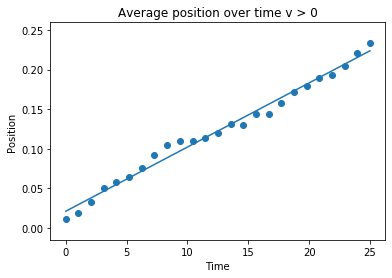

In [39]:
# Opgave 3.6 f

result = 1
n = 0
while result >= 0.05:
    n += 1
    diffusion_constants = []
    for i in range(0, 10):
        time, M1, M2, variance = diffuse(n_molecules=n)
        
        diffusion_constants.append(np.mean(M2[1:] / (2 * time[1:])))
        
    diffusion_constants = np.array(diffusion_constants)
    result = np.std(diffusion_constants) / np.mean(diffusion_constants)

print(f'Using {n} atoms gives an error <5%.')
time, M1, M2, variance = diffuse(n_molecules=n)
f_x, a, b = linear_fit(time, M1)

plt.scatter(time, M1)
plt.plot(time, a * time + b)
plt.title('Average position over time v > 0')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

STD: 0.0067178561552430115, AVG: 0.2531044603728124.
STD/AVG: 0.026541832353913823


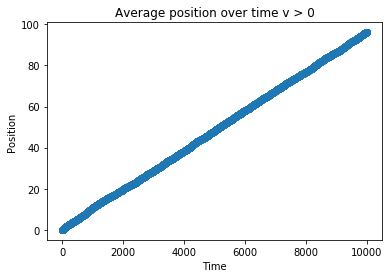

In [41]:
# Opgave 3.6 g
diffusion_constants = []
for i in range(0, 10):
    time, M1, M2, variance = diffuse(n_t=10000)
    
    diffusion_constants.append(np.mean(M2[1:] / (2 * time[1:])))
    
diffusion_constants = np.array(diffusion_constants)
print(f'STD: {np.std(diffusion_constants)}, AVG: {np.mean(diffusion_constants)}.')
print(f'STD/AVG: {np.std(diffusion_constants)  / np.mean(diffusion_constants)}')

time, M1, M2, variance = diffuse(n_t=10000)
f_x, a, b = linear_fit(time, M1)

plt.scatter(time, M1)
plt.plot(time, a * time + b)
plt.title('Average position over time v > 0')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

Dus ja, met heel veel tijdstappen kan in ieder geval een STD van 3% worden bereikt.
